In [ ]:
import pandas as pd
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the preprocessed data
data = pd.read_csv('C:/Users/thanh/Downloads/Shopping Mall Customer Segmentation Data preprocessed.csv')

# Extract features for clustering (excluding customer_id)
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
X = data[numeric_cols]
# Apply Affinity Propagation with default parameters
af = AffinityPropagation().fit(X)

# Get cluster labels
cluster_labels = af.labels_

# Add cluster labels to the original data
data['Cluster'] = cluster_labels

# Analyze the clusters
n_clusters = len(af.cluster_centers_)
print(f"Number of clusters identified: {n_clusters}")

Number of clusters identified: 257


In [7]:
import os
print("File sẽ được lưu tại:", os.getcwd())

File sẽ được lưu tại: c:\Users\thanh\Desktop


In [8]:
output_path = r'C:\Users\thanh\Desktop\customer_clusters_result.csv'
data.to_csv(output_path, index=False)
print("Đã lưu file tại:", output_path)

Đã lưu file tại: C:\Users\thanh\Desktop\customer_clusters_result.csv


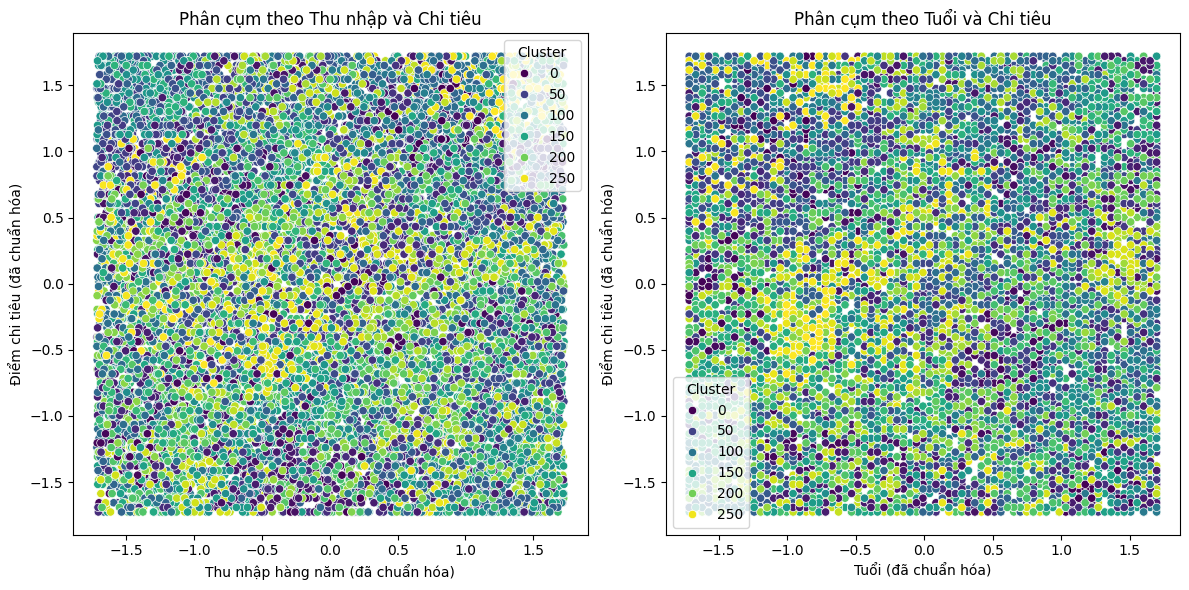

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Biểu đồ phân tán Annual Income vs Spending Score
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='annual_income', y='spending_score', hue='Cluster', palette='viridis')
plt.title('Phân cụm theo Thu nhập và Chi tiêu')
plt.xlabel('Thu nhập hàng năm (đã chuẩn hóa)')
plt.ylabel('Điểm chi tiêu (đã chuẩn hóa)')

# Biểu đồ phân tán Age vs Spending Score
plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='age', y='spending_score', hue='Cluster', palette='viridis')
plt.title('Phân cụm theo Tuổi và Chi tiêu')
plt.xlabel('Tuổi (đã chuẩn hóa)')
plt.ylabel('Điểm chi tiêu (đã chuẩn hóa)')

plt.tight_layout()
plt.show()

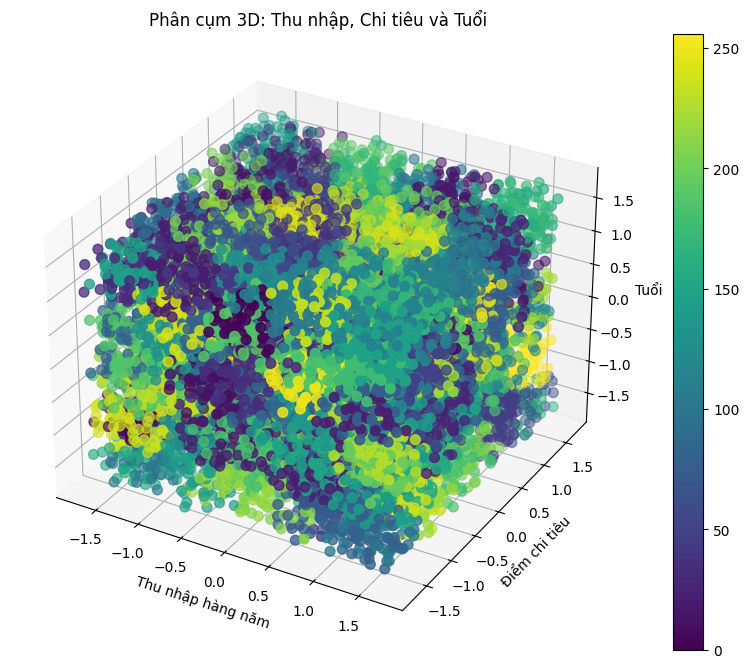

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data['annual_income'], 
                    data['spending_score'], 
                    data['age'], 
                    c=data['Cluster'], 
                    cmap='viridis',
                    s=50)

ax.set_xlabel('Thu nhập hàng năm')
ax.set_ylabel('Điểm chi tiêu')
ax.set_zlabel('Tuổi')
plt.title('Phân cụm 3D: Thu nhập, Chi tiêu và Tuổi')
plt.colorbar(scatter)
plt.show()

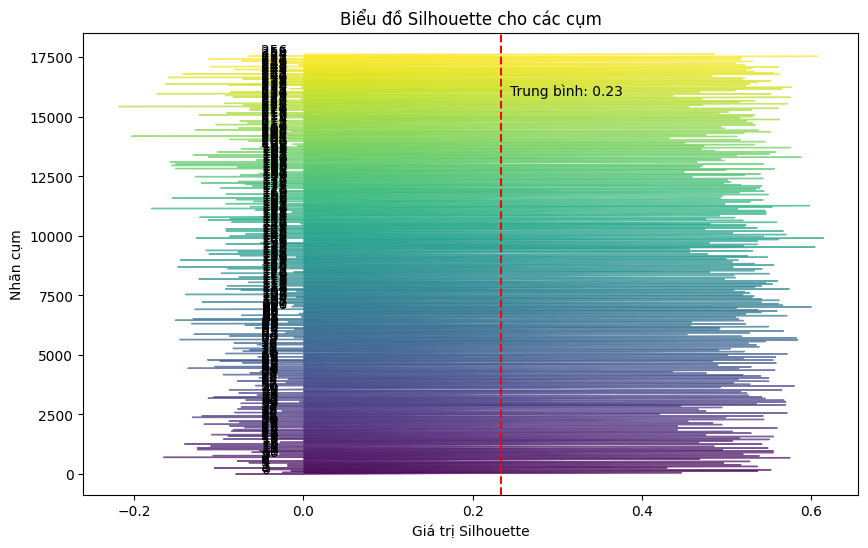

In [ ]:
# Tính silhouette cho từng điểm
sample_silhouette_values = silhouette_samples(features, labels)

# Biểu đồ silhouette
plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(len(np.unique(labels))):
    # Aggregate the silhouette scores for samples belonging to cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = plt.cm.viridis(float(i) / len(np.unique(labels)))
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    # Label the silhouette plots with their cluster numbers at the middle
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    y_lower = y_upper + 10  # 10 for the 0 samples

plt.title("Biểu đồ Silhouette cho các cụm")
plt.xlabel("Giá trị Silhouette")
plt.ylabel("Nhãn cụm")

# Đường trung bình silhouette
silhouette_avg = silhouette_score(features, labels)
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.text(silhouette_avg + 0.01, y_lower * 0.9, f"Trung bình: {silhouette_avg:.2f}")

plt.show()

In [17]:
# Đọc dữ liệu
data = pd.read_csv('customer_clusters_result.csv')
# Lấy các features và nhãn cụm
features = data[['age', 'annual_income', 'spending_score', 'gender_Female']]
labels = data['Cluster']
# Tính Silhouette Score
score = silhouette_score(features, labels)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.2336
